In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
car = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
car.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
car.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [4]:
car.info

<bound method DataFrame.info of       engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                     170            3.0       159.0     3413.433759   
1                     130            5.0        97.0     3149.664934   
2                     170            NaN        78.0     3079.038997   
3                     220            4.0         NaN     2542.392402   
4                     210            1.0       140.0     3460.870990   
...                   ...            ...         ...             ...   
9699                  140            5.0       164.0     2981.107371   
9700                  180            NaN       154.0     2439.525729   
9701                  220            2.0       138.0     2583.471318   
9702                  230            4.0       177.0     2905.527390   
9703                  270            3.0       140.0     2908.043477   

      acceleration  model_year  origin fuel_type         drivetrain  \
0             17.7        2003  

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [6]:
car.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [7]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,170.000000,200.000000,230.000000,380.000000
num_cylinders,9222.0,3.962481,1.999323,0.000000,3.000000,4.000000,5.000000,13.000000
horsepower,8996.0,149.657292,29.879555,37.000000,130.000000,149.000000,170.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,2666.248985,2993.226296,3334.957039,4739.077089
acceleration,8774.0,15.021928,2.510339,6.000000,13.300000,15.000000,16.700000,24.300000
model_year,9704.0,2011.484027,6.659808,2000.000000,2006.000000,2012.000000,2017.000000,2023.000000
num_doors,9202.0,-0.006412,1.048162,-4.000000,-1.000000,0.000000,1.000000,4.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,13.267459,15.006037,16.707965,25.967222


In [8]:
car.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

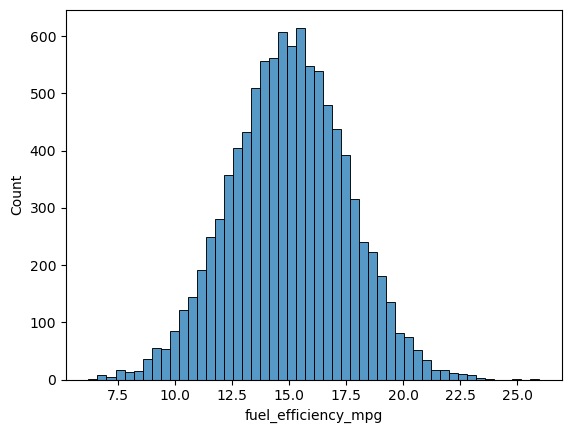

In [9]:
sns.histplot(car["fuel_efficiency_mpg"], bins = 50)

In [10]:
base = ["horsepower", "vehicle_weight", "vehicle_weight", "model_year", "fuel_efficiency_mpg"]
base
car = car[base]
car

,horsepower,vehicle_weight,vehicle_weight,model_year,fuel_efficiency_mpg
0,159.0,3413.433759,3413.433759,2003,13.231729
1,97.0,3149.664934,3149.664934,2007,13.688217
2,78.0,3079.038997,3079.038997,2018,14.246341
3,NaN,2542.392402,2542.392402,2009,16.912736
4,140.0,3460.870990,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,164.0,2981.107371,2981.107371,2013,15.101802
9700,154.0,2439.525729,2439.525729,2004,17.962326
9701,138.0,2583.471318,2583.471318,2008,17.186587
9702,177.0,2905.527390,2905.527390,2011,15.331551


In [11]:
n = len(car)
n

9704

In [12]:
idx = np.arange(n)
seed = np.random.seed(42)
np.random.shuffle(idx)

In [13]:
n_val = int(n * 0.2)
n_test = int( n * 0.2)
n_train = n - n_val - n_test

In [14]:
df_train = car.iloc[idx[:n_train]]
df_val = car.iloc[idx[n_train:n_train+ n_val]]
df_test = car.iloc[idx[n_train+n_val:]]

In [15]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [16]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [17]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [18]:
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

In [19]:
df_train.columns

Index(['horsepower', 'vehicle_weight', 'vehicle_weight', 'model_year'], dtype='object')

In [20]:
df_train.dtypes

horsepower        float64
vehicle_weight    float64
vehicle_weight    float64
model_year          int64
dtype: object

In [21]:
df_train.isnull().sum()

horsepower        429
vehicle_weight      0
vehicle_weight      0
model_year          0
dtype: int64

In [22]:
X_train = df_train.fillna(0).values

In [23]:
X_train

array([[ 144.        , 2535.88759124, 2535.88759124, 2009.        ],
       [ 141.        , 2741.17048439, 2741.17048439, 2019.        ],
       [ 155.        , 2471.88023726, 2471.88023726, 2017.        ],
       ...,
       [ 152.        , 2500.17568746, 2500.17568746, 2020.        ],
       [ 154.        , 2254.31324473, 2254.31324473, 2002.        ],
       [ 152.        , 2435.20360628, 2435.20360628, 2004.        ]])

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    xtx = X.T.dot(X)
    xtx_inv = np.linalg.pinv(xtx)
    w_full = xtx_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [25]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [26]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [27]:
y_pred

array([17.33327524, 16.29682476, 17.69578259, ..., 17.54430329,
       18.77798858, 17.86470352])

In [28]:
import matplotlib.pyplot as plt

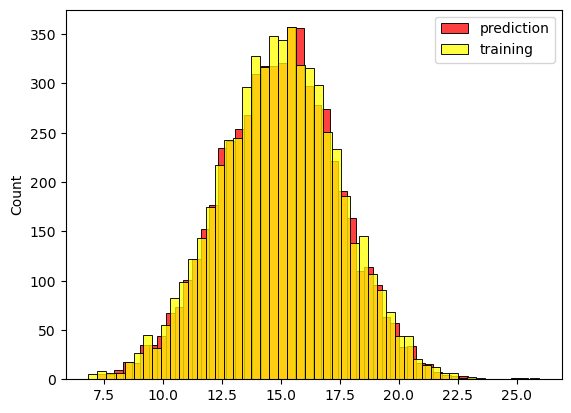

In [29]:
sns.histplot(y_pred, color = "red", label = "prediction", bins = 50)
sns.histplot(y_train, color = "yellow", label = "training", bins = 50)
plt.legend()

In [30]:
def rmse(y, y_pred):
    mse = ( y - y_pred)**2
    se = mse.mean()
    return np.sqrt(se)

In [31]:
rmse(y_train, y_pred)

np.float64(0.5202847018228264)

In [32]:
X_val = df_val.fillna(0).values
X_val

array([[ 112.        , 2772.13441008, 2772.13441008, 2020.        ],
       [ 138.        , 3014.06152983, 3014.06152983, 2022.        ],
       [ 181.        , 3652.18615117, 3652.18615117, 2016.        ],
       ...,
       [ 202.        , 3303.00068812, 3303.00068812, 2008.        ],
       [ 169.        , 3293.42025107, 3293.42025107, 2008.        ],
       [ 117.        , 2692.7812918 , 2692.7812918 , 2004.        ]])

In [33]:
w0, w = train_linear_regression(X_train, y_train)
y_preds = w0 + X_val.dot(w)
y_preds

array([16.03923531, 14.91909886, 11.87021321, ..., 13.69250365,
       13.62368079, 16.44943792])

In [34]:
rmse(y_val, y_preds)

np.float64(0.5174258700545222)

In [35]:
def train_linear_regression_reg(X, y, r= 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    xtx = X.T.dot(X)
    reg = r * np.eye(xtx.shape[0])
    xtx = xtx + reg

    xtx_inv = np.linalg.pinv(xtx)
    w_full = xtx_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [36]:
X_train = df_train.fillna(0).values

In [37]:
for r in [0.0, 0.01, 0.1, 1, 10, 100]:
 w0, w = train_linear_regression_reg(X_train, y_train,r = r)
X_train = df_train.fillna(0).values

w0, w = train_linear_regression_reg(X_train, y_train,r = r)
X_val = df_val.fillna(0).values

y_preds = w0 + X_val.dot(w)
score = rmse(y_val, y_preds)

print(r, round(score,2))


100 0.52


In [38]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    
    n= len(car)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int( n * 0.2)
    n_train = n - n_val - n_test

    df_train = car.iloc[idx[:n_train]]
    df_val = car.iloc[idx[n_train:n_train+ n_val]]
    df_test = car.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train["fuel_efficiency_mpg"]
    del df_val["fuel_efficiency_mpg"]
    del df_test["fuel_efficiency_mpg"]

    X_train = df_train.fillna(0).values
    
    X_val = df_val.fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_preds = w0 + X_val.dot(w)

    Score = rmse(y_val, y_preds)
    scores.append(Score)
    
    print(seed, round(Score, 2))

     







   

0 0.52
1 0.52
2 0.52
3 0.52
4 0.51
5 0.53
6 0.53
7 0.51
8 0.51
9 0.51


In [39]:
score = np.std(score)
print(f" the round of the results in this car price:{round(score)}")

 the round of the results in this car price:0


In [40]:
n= len(car)
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)
n_val = int(n * 0.2)
n_test = int( n * 0.2)
n_train = n - n_val - n_test

df_train = car.iloc[idx[:n_train]]
df_val = car.iloc[idx[n_train:n_train+ n_val]]
df_test = car.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]


In [41]:
X_test = df_test.fillna(0).values


In [42]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [43]:
X_full_train = df_full_train.fillna(0).values
y_full_train = np.concatenate([y_train, y_val])

In [44]:
r = 0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = r)
X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)

In [45]:
score = rmse(y_val, y_preds)
score

np.float64(0.5130720755168379)